In [ ]:
##################################################################################################################################
# Robotic Dough Shaping - Show results from experiments
#   Project for Robot Manipulation (CS 6751), Cornell University, Spring 2022
#   Group members: Di Ni, Xi Deng, Zeqi Gu, Henry Zheng, Jan (Janko) Ondras
##################################################################################################################################
# Author: 
#   Janko Ondras (jo951030@gmail.com)
##################################################################################################################################

# Experiment 1 [exp01] - compare 3 materials across 3 start methods
- target shape diameter = 4 inch,
  roll end point method = target,
  shrink = disabled
- named Experiment 1 and 2 in the demo video

In [68]:
import json
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


exp_id = 'exp01'

material_labels = {
    'play-doh': 'Play-Doh',
    'plasticine': 'Plasticine',
    'kinetic-sand': 'Kinetic sand'
}

start_method_labels = {
    'centroid-2d': 'Centroid-2D',
    'centroid-3d': 'Centroid-3D',
    'highest-point': 'Highest-Point'
}

data = { material: dict() for material in material_labels.keys() }

for log_file in sorted(glob.glob(f'./logs/{exp_id}/log_*.csv')):
    # print(log_file)

    df = pd.read_csv(log_file)
    params = json.loads(df.iloc[0].keys()[0])
    # print(json.dumps(params, indent=2))
    df = pd.read_csv(log_file, skiprows=1, index_col=False)

    if params['start_method'] not in data[params['material']]:
        data[params['material']][params['start_method']] = []

    data[params['material']][params['start_method']].append(df)


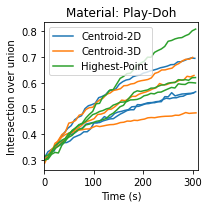

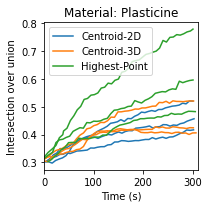

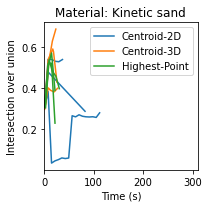

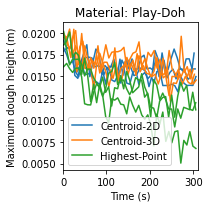

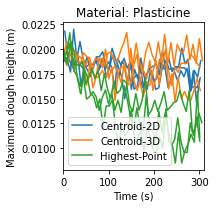

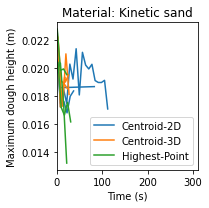

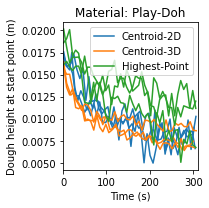

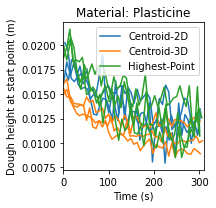

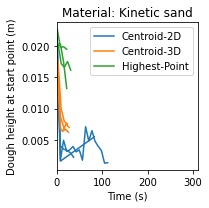

In [71]:
# Compare methods by material

colors = list(mcolors.TABLEAU_COLORS.keys())[:3]

metric_labels = {
    'IoU': 'Intersection over union',
    'Max dough height (m)': 'Maximum dough height (m)',
    'Dough height at S (m)': 'Dough height at start point (m)'
}

for metric, metric_label in metric_labels.items():
    for material_label in material_labels.keys():
        plt.figure(figsize=(3,3))#figsize=(20,10))
        for start_method_label, color in zip(start_method_labels, colors):
            for i, df in enumerate(data[material_label][start_method_label]):
                label = start_method_labels[start_method_label] if i == 0 else None
                plt.plot(df['Time (s)'], df[metric], color=color, label=label)
        plt.xlim(0, 310)
        # plt.ylim(0, ymax)
        plt.xlabel('Time (s)')
        plt.ylabel(metric_label)
        plt.title(f'Material: {material_labels[material_label]}')
        plt.legend()
        # plt.suptitle('Time between annotations of different types in terms of dining time interval they were made in')
        plt.tight_layout()
        plt.show()


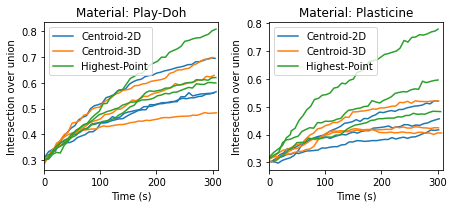

In [53]:
# The above modified for paper visualization

colors = list(mcolors.TABLEAU_COLORS.keys())[:3]

metric_labels = {
    'IoU': 'Intersection over union',
    'Max dough height (m)': 'Maximum dough height (m)',
    'Dough height at S (m)': 'Dough height at start point (m)'
}

# import matplotlib
# matplotlib.rcParams.update({'font.size': 14})

for metric, metric_label in metric_labels.items():
    plt.figure(figsize=(6.4, 3))#figsize=(6.4, 4.8))#figsize=(20,10))
    for i, material_label in enumerate(material_labels.keys()):
        if i > 1: continue
        plt.subplot(1, 2, i + 1)
        for start_method_label, color in zip(start_method_labels, colors):
            for i, df in enumerate(data[material_label][start_method_label]):
                label = start_method_labels[start_method_label] if i == 0 else None
                plt.plot(df['Time (s)'], df[metric], color=color, label=label)
        plt.xlim(0, 310)
        # plt.ylim(0, ymax)
        plt.xlabel('Time (s)')
        plt.ylabel(metric_label)
        plt.title(f'Material: {material_labels[material_label]}')
        plt.legend()
        # plt.suptitle('Time between annotations of different types in terms of dining time interval they were made in')
        plt.tight_layout()
    plt.show()
    break


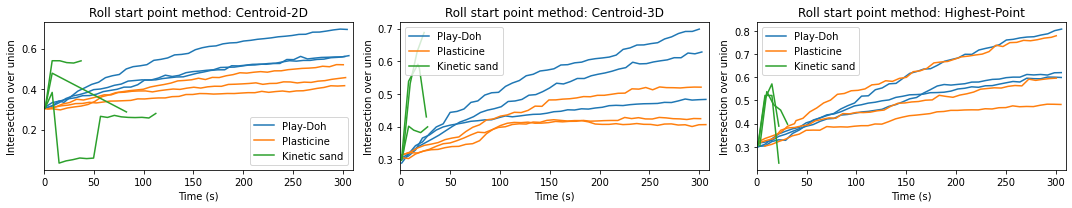

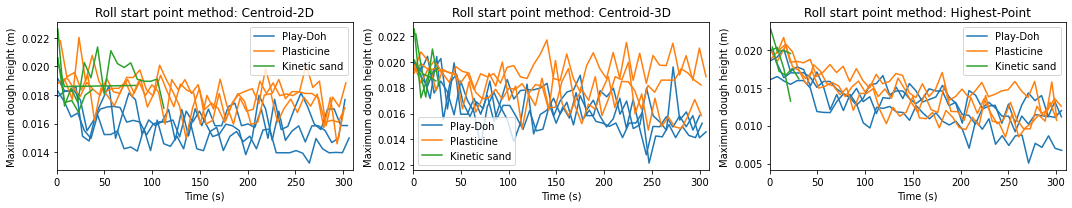

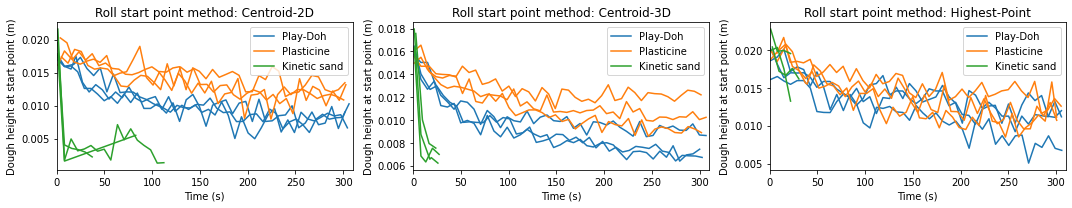

In [57]:
# Compare materials by methods

colors = list(mcolors.TABLEAU_COLORS.keys())[:3]

metric_labels = {
    'IoU': 'Intersection over union',
    'Max dough height (m)': 'Maximum dough height (m)',
    'Dough height at S (m)': 'Dough height at start point (m)'
}

for metric, metric_label in metric_labels.items():
        
    plt.figure(figsize=(15, 3))#figsize=(20,10))
    for i, start_method_label in enumerate(start_method_labels.keys()):
        plt.subplot(1, 3, i + 1)
        for material_label, color in zip(material_labels.keys(), colors):
            for i, df in enumerate(data[material_label][start_method_label]):
                label = material_labels[material_label] if i == 0 else None
                plt.plot(df['Time (s)'], df[metric], color=color, label=label)
        plt.xlim(0, 310)
        # plt.ylim(0, ymax)
        plt.xlabel('Time (s)')
        plt.ylabel(metric_label)
        plt.title(f'Roll start point method: {start_method_labels[start_method_label]}')
        plt.legend()
        # plt.suptitle('Time between annotations of different types in terms of dining time interval they were made in')
        plt.tight_layout()
    plt.show()

## Results in table format

In [39]:
from tabulate import tabulate

tab_data = []
for start_method_label in start_method_labels.keys():
    row_data = []
    for material_label in material_labels.keys():
        # Take last IoU value
        runs = [ df["IoU"].iloc[-1] for df in data[material_label][start_method_label] ]
        # Take the max IoU value
        # runs = [ df["IoU"].max() for df in data[material_label][start_method_label] ]

        row_data.append(f'{np.mean(runs):.3f} +/- {np.std(runs):.3f}')
    tab_data.append(row_data)

tab_data = np.array(tab_data)
print(tab_data)

print(tabulate(tab_data, headers=material_labels.values(), 
               tablefmt='fancy_grid', 
               showindex=start_method_labels.values(), 
               numalign='center'
              ))
print(tabulate(tab_data, headers=material_labels.values(), 
               tablefmt='latex_booktabs', 
               showindex=start_method_labels.values(), 
               numalign='center'
              ))

###################################################################################
# Last value
# [['0.607 +/- 0.062' '0.465 +/- 0.043' '0.369 +/- 0.121']
#  ['0.603 +/- 0.090' '0.451 +/- 0.050' '0.506 +/- 0.129']
#  ['0.676 +/- 0.094' '0.620 +/- 0.122' '0.339 +/- 0.077']]
# ╒═══════════════╤═════════════════╤═════════════════╤═════════════════╕
# │               │ Play-Doh        │ Plasticine      │ Kinetic sand    │
# ╞═══════════════╪═════════════════╪═════════════════╪═════════════════╡
# │ Centroid-2D   │ 0.607 +/- 0.062 │ 0.465 +/- 0.043 │ 0.369 +/- 0.121 │
# ├───────────────┼─────────────────┼─────────────────┼─────────────────┤
# │ Centroid-3D   │ 0.603 +/- 0.090 │ 0.451 +/- 0.050 │ 0.506 +/- 0.129 │
# ├───────────────┼─────────────────┼─────────────────┼─────────────────┤
# │ Highest-Point │ 0.676 +/- 0.094 │ 0.620 +/- 0.122 │ 0.339 +/- 0.077 │
# ╘═══════════════╧═════════════════╧═════════════════╧═════════════════╛
# \begin{tabular}{llll}
# \toprule
#                & Play-Doh        & Plasticine      & Kinetic sand    \\
# \midrule
#  Centroid-2D   & 0.607 +/- 0.062 & 0.465 +/- 0.043 & 0.369 +/- 0.121 \\
#  Centroid-3D   & 0.603 +/- 0.090 & 0.451 +/- 0.050 & 0.506 +/- 0.129 \\
#  Highest-Point & 0.676 +/- 0.094 & 0.620 +/- 0.122 & 0.339 +/- 0.077 \\
# \bottomrule
# \end{tabular}
###################################################################################
# Max value
# [['0.608 +/- 0.063' '0.465 +/- 0.043' '0.468 +/- 0.064']
#  ['0.604 +/- 0.089' '0.457 +/- 0.046' '0.560 +/- 0.119']
#  ['0.676 +/- 0.093' '0.620 +/- 0.122' '0.544 +/- 0.021']]
# ╒═══════════════╤═════════════════╤═════════════════╤═════════════════╕
# │               │ Play-Doh        │ Plasticine      │ Kinetic sand    │
# ╞═══════════════╪═════════════════╪═════════════════╪═════════════════╡
# │ Centroid-2D   │ 0.608 +/- 0.063 │ 0.465 +/- 0.043 │ 0.468 +/- 0.064 │
# ├───────────────┼─────────────────┼─────────────────┼─────────────────┤
# │ Centroid-3D   │ 0.604 +/- 0.089 │ 0.457 +/- 0.046 │ 0.560 +/- 0.119 │
# ├───────────────┼─────────────────┼─────────────────┼─────────────────┤
# │ Highest-Point │ 0.676 +/- 0.093 │ 0.620 +/- 0.122 │ 0.544 +/- 0.021 │
# ╘═══════════════╧═════════════════╧═════════════════╧═════════════════╛
# \begin{tabular}{llll}
# \toprule
#                & Play-Doh        & Plasticine      & Kinetic sand    \\
# \midrule
#  Centroid-2D   & 0.608 +/- 0.063 & 0.465 +/- 0.043 & 0.468 +/- 0.064 \\
#  Centroid-3D   & 0.604 +/- 0.089 & 0.457 +/- 0.046 & 0.560 +/- 0.119 \\
#  Highest-Point & 0.676 +/- 0.093 & 0.620 +/- 0.122 & 0.544 +/- 0.021 \\
# \bottomrule
# \end{tabular}

[['0.607 +/- 0.062' '0.465 +/- 0.043' '0.369 +/- 0.121']
 ['0.603 +/- 0.090' '0.451 +/- 0.050' '0.506 +/- 0.129']
 ['0.676 +/- 0.094' '0.620 +/- 0.122' '0.339 +/- 0.077']]
╒═══════════════╤═════════════════╤═════════════════╤═════════════════╕
│               │ Play-Doh        │ Plasticine      │ Kinetic sand    │
╞═══════════════╪═════════════════╪═════════════════╪═════════════════╡
│ Centroid-2D   │ 0.607 +/- 0.062 │ 0.465 +/- 0.043 │ 0.369 +/- 0.121 │
├───────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Centroid-3D   │ 0.603 +/- 0.090 │ 0.451 +/- 0.050 │ 0.506 +/- 0.129 │
├───────────────┼─────────────────┼─────────────────┼─────────────────┤
│ Highest-Point │ 0.676 +/- 0.094 │ 0.620 +/- 0.122 │ 0.339 +/- 0.077 │
╘═══════════════╧═════════════════╧═════════════════╧═════════════════╛
\begin{tabular}{llll}
\toprule
               & Play-Doh        & Plasticine      & Kinetic sand    \\
\midrule
 Centroid-2D   & 0.607 +/- 0.062 & 0.465 +/- 0.043 & 0.369 +/- 0.121

# Experiment 2 [exp02] - compare 2 roll end point methods
- target shape = 4.5 inch (largest => to see difference), 
  material = play-doh, 
  roll start point method = highest-point, 
  shrink = disabled

In [72]:
import json
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


exp_id = 'exp02'

end_methods = [
    'target',
    'current'
]

data = { end_method: [] for end_method in end_methods }

for log_file in sorted(glob.glob(f'./logs/{exp_id}/log_*.csv')):
    # print(log_file)

    df = pd.read_csv(log_file)
    params = json.loads(df.iloc[0].keys()[0])
    # print(json.dumps(params, indent=2))
    df = pd.read_csv(log_file, skiprows=1, index_col=False)

    data[params['end_method']].append(df)


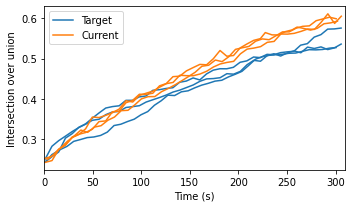

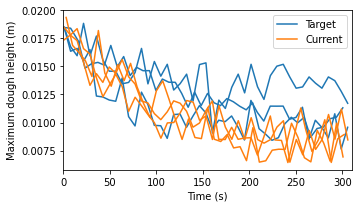

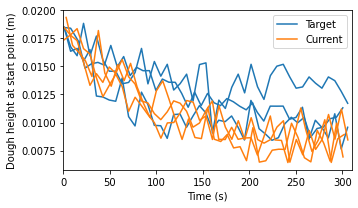

In [73]:
# Compare end methods

colors = list(mcolors.TABLEAU_COLORS.keys())[:2]

metric_labels = {
    'IoU': 'Intersection over union',
    'Max dough height (m)': 'Maximum dough height (m)',
    'Dough height at S (m)': 'Dough height at start point (m)'
}

for metric, metric_label in metric_labels.items():
    plt.figure(figsize=(5,3)) #plt.figure()
    for end_method, color in zip(end_methods, colors):
        for i, df in enumerate(data[end_method]):
            label = end_method.capitalize() if i == 0 else None
            plt.plot(df['Time (s)'], df[metric], color=color, label=label)
    plt.xlim(0, 310)
    # plt.ylim(0, ymax)
    plt.xlabel('Time (s)')
    plt.ylabel(metric_label)
    # plt.title(f'Material: {material}')
    plt.legend()
    # plt.suptitle('Time between annotations of different types in terms of dining time interval they were made in')
    plt.tight_layout()
    plt.show()


# Experiment 3 [exp03] - compare with shrink action enabled (2 variants) vs. disabled
- target shape = 3.5 inch (smallest => easiest to overshoot the target shape),
  material = play-doh, 
  roll start point method = highest-point,
  roll end point method = target

In [74]:
import json
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


exp_id = 'exp03'

shrink_methods = [
    'Shrink-Disabled',
    'Forward-Shrink',
    'Side-Shrink'
]

data = { shrink_method: [] for shrink_method in shrink_methods }

for log_file in sorted(glob.glob(f'./logs/{exp_id}/log_*.csv')):
    # print(log_file)

    df = pd.read_csv(log_file)
    params = json.loads(df.iloc[0].keys()[0])
    # print(json.dumps(params, indent=2))
    df = pd.read_csv(log_file, skiprows=1, index_col=False)

    if not params['enable_shrink']:
        shrink_method = 'Shrink-Disabled'
    elif params['side_shrink']:
        shrink_method = 'Side-Shrink'
    else:
        shrink_method = 'Forward-Shrink'

    data[shrink_method].append(df)


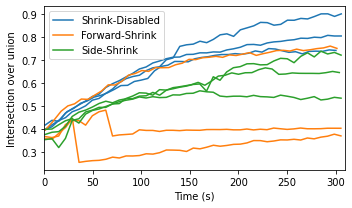

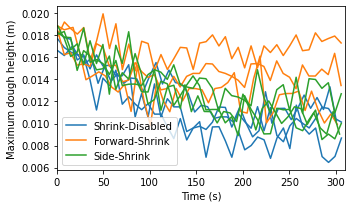

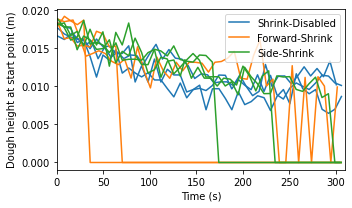

In [75]:
# Compare end methods

colors = list(mcolors.TABLEAU_COLORS.keys())[:3]

metric_labels = {
    'IoU': 'Intersection over union',
    'Max dough height (m)': 'Maximum dough height (m)',
    'Dough height at S (m)': 'Dough height at start point (m)'
}

for metric, metric_label in metric_labels.items():
    plt.figure(figsize=(5,3))#figsize=(20,10))
    for shrink_method, color in zip(shrink_methods, colors):
        for i, df in enumerate(data[shrink_method]):
            label = shrink_method if i == 0 else None
            plt.plot(df['Time (s)'], df[metric], color=color, label=label)
    plt.xlim(0, 310)
    # plt.ylim(0, ymax)
    plt.xlabel('Time (s)')
    plt.ylabel(metric_label)
    # plt.title(f'Material: {material}')
    plt.legend()
    # plt.suptitle('Time between annotations of different types in terms of dining time interval they were made in')
    plt.tight_layout()
    plt.show()


# Post-Experiment 4 [exp04] - evaluate the highest-point method across three target shape sizes
- material = play-doh, 
  roll start point method = highest-point, 
  roll end point method = target, 
  shrink = disabled

In [76]:
import json
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


target_shape_size_to_exp_id = {
    r'T$_{3.5}$ (3.5 in)': 'exp03',
    r'T$_{4.0}$ (4.0 in)': 'exp01',
    r'T$_{4.5}$ (4.5 in)': 'exp02'
}

material = 'play-doh'
start_method = 'highest-point'
end_method = 'target'
shrink_enabled = False

for target_shape_size, exp_id in target_shape_size_to_exp_id.items():

    data[target_shape_size] = []
    for log_file in sorted(glob.glob(f'./logs/{exp_id}/log_*.csv')):
        # print(log_file)

        df = pd.read_csv(log_file)
        params = json.loads(df.iloc[0].keys()[0])
        # print(json.dumps(params, indent=2))
        df = pd.read_csv(log_file, skiprows=1, index_col=False)

        if params['material'] == material and params['start_method'] == start_method and params['end_method'] == end_method and params['enable_shrink'] == shrink_enabled:
            data[target_shape_size].append(df)


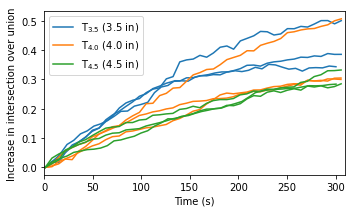

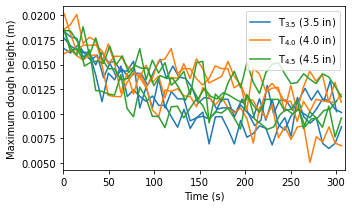

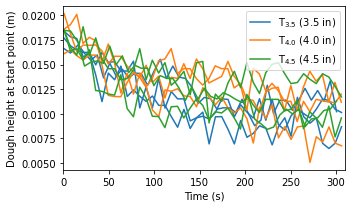

[[0.40963723 0.3703922  0.30030552]
 [0.00967352 0.0099663  0.0108667 ]
 [0.00967352 0.0099663  0.0108667 ]]


In [78]:
# Compare start methods across target shapes

colors = list(mcolors.TABLEAU_COLORS.keys())[:3]

metric_labels = {
    'IoU': 'Increase in intersection over union',
    'Max dough height (m)': 'Maximum dough height (m)',
    'Dough height at S (m)': 'Dough height at start point (m)'
}

# end_values_table = []
# for metric, metric_label in metric_labels.items():
#     end_values_row = []
#     plt.figure()#figsize=(20,10))
#     for target_shape_size, color in zip(target_shape_size_to_exp_id.keys(), colors):
#         end_values = []
#         for i, df in enumerate(data[target_shape_size]):
#             label = target_shape_size if i == 0 else None
#             plt.plot(df['Time (s)'], df[metric], color=color, label=label)
#             end_values.append(df[metric].iloc[-1])
#         end_values_row.append(np.mean(end_values))
#     end_values_table.append(end_values_row)
#     # plt.xlim(0, 55)
#     # plt.ylim(0, ymax)
#     plt.xlabel('Time (s)')
#     plt.ylabel(metric_label)
#     # plt.title(f'Material: {material}')
#     plt.legend()
#     # plt.suptitle('Time between annotations of different types in terms of dining time interval they were made in')
#     plt.tight_layout()
#     plt.show()

# end_values_table = np.array(end_values_table)
# print(end_values_table)


# WARNING!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Need to evaluate the change in IOU w.r.t. the starting IOU
end_values_table = []
for metric, metric_label in metric_labels.items():
    end_values_row = []
    plt.figure(figsize=(5,3))#figsize=(20,10))
    for target_shape_size, color in zip(target_shape_size_to_exp_id.keys(), colors):
        end_values = []
        for i, df in enumerate(data[target_shape_size]):
            label = target_shape_size if i == 0 else None
            y = df[metric]
            if metric == 'IoU':
                y = y - df[metric].iloc[0]
            plt.plot(df['Time (s)'], y, color=color, label=label)
            end_values.append(y.iloc[-1])
        end_values_row.append(np.mean(end_values))
    end_values_table.append(end_values_row)
    plt.xlim(0, 310)
    # plt.ylim(0, ymax)
    plt.xlabel('Time (s)')
    plt.ylabel(metric_label)
    # plt.title(f'Material: {material}')
    plt.legend()
    # plt.suptitle('Time between annotations of different types in terms of dining time interval they were made in')
    plt.tight_layout()
    plt.show()

end_values_table = np.array(end_values_table)
print(end_values_table)
